## Test Devito one sided derivative implementation

In [1]:
from devito import (Eq, Grid, Function, Operator, SpaceDimension, configuration)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
mpl.rc('font', size=14)

# configuration["log-level"] = 'DEBUG'

xmin = 0.0
xmax = np.pi
nx = 51
shape = (nx, )
origin =(xmin, )
extent = (xmax - xmin, )
spacing = (extent[0] / (nx - 1), )
xarr = np.linspace(xmin, xmax, nx)

print("shape;   ", shape)
print("origin;  ", origin)
print("spacing; ", spacing)
print("extent;  ", extent)

grid = Grid(shape=shape, origin=origin, extent=extent)

shape;    (51,)
origin;   (0.0,)
spacing;  (0.06283185307179587,)
extent;   (3.141592653589793,)


In [2]:
# Functions and values
f = Function(name='f', grid=grid, space_order=4)
g1 = Function(name='g1', grid=grid, space_order=4)
g2 = Function(name='g2', grid=grid, space_order=4)
d1a = Function(name='d1a', grid=grid, space_order=4)
d1b = Function(name='d1b', grid=grid, space_order=4)
d1c = Function(name='d1x', grid=grid, space_order=4)
d2a = Function(name='d2a', grid=grid, space_order=4)
d2b = Function(name='d2b', grid=grid, space_order=4)
d2c = Function(name='d2c', grid=grid, space_order=4)

x = f.dimensions[0]
dx = x.spacing

for k in range(nx):
    f.data[k]  = + np.sin(xarr[k])
    g1.data[k] = + np.cos(xarr[k])
    g2.data[k] = - np.sin(xarr[k])

In [3]:
# Fornberg derivatives, Table 3
d1_backward = (1/dx) * (+3/2 * f[x] - 2 * f[x-1] + 1/2 * f[x-2])
d1_forward  = (1/dx) * (-3/2 * f[x] + 2 * f[x+1] - 1/2 * f[x+2])

d2_backward = (1/dx**2) * (+ 2 * f[x] - 5 * f[x-1] + 4 * f[x-2] - 1 * f[x-3])
d2_forward  = (1/dx**2) * (+ 2 * f[x] - 5 * f[x+1] + 4 * f[x+2] - 1 * f[x+3])

eq1a = Eq(d1a, f.dx)
eq1b = Eq(d1b, d1_backward)
eq1c = Eq(d1c, d1_forward)

eq2a = Eq(d2a, f.dx2)
eq2b = Eq(d2b, d2_backward)
eq2c = Eq(d2c, d2_forward)

Operator([eq1a] + [eq1b] + [eq1c] + [eq2a] + [eq2b] + [eq2c])()

Operator `Kernel` run in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=9.999999999999999e-06, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

Text(0.5, 1.0, 'One sided first derivative')

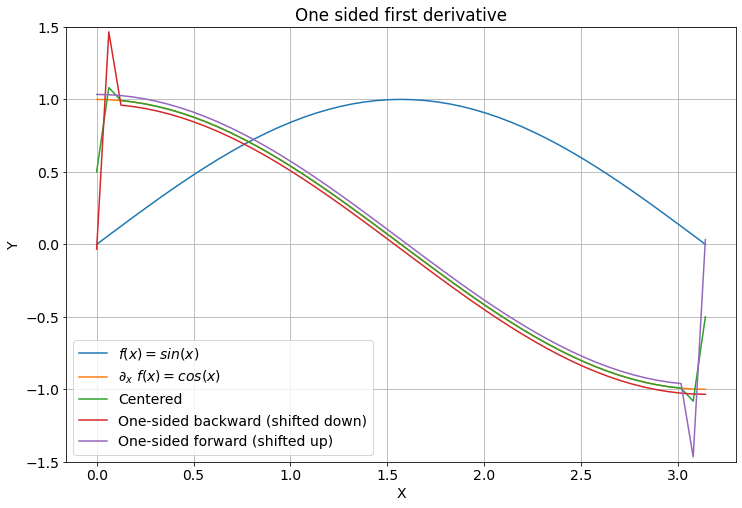

In [4]:
plt.figure(figsize=(12,8))

shift = 0.033
plt.plot(xarr, f.data, label='$f(x)=sin(x)$')
plt.plot(xarr, g1.data, label='$\partial_x\ f(x) = cos(x)$')
plt.plot(xarr, d1a.data, label='Centered')
plt.plot(xarr, d1b.data-shift, label='One-sided backward (shifted down)')
plt.plot(xarr, d1c.data+shift, label='One-sided forward (shifted up)')
plt.ylim([-1.5, +1.5])
plt.legend(loc='lower left')
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("One sided first derivative")

Text(0.5, 1.0, 'One sided second derivative')

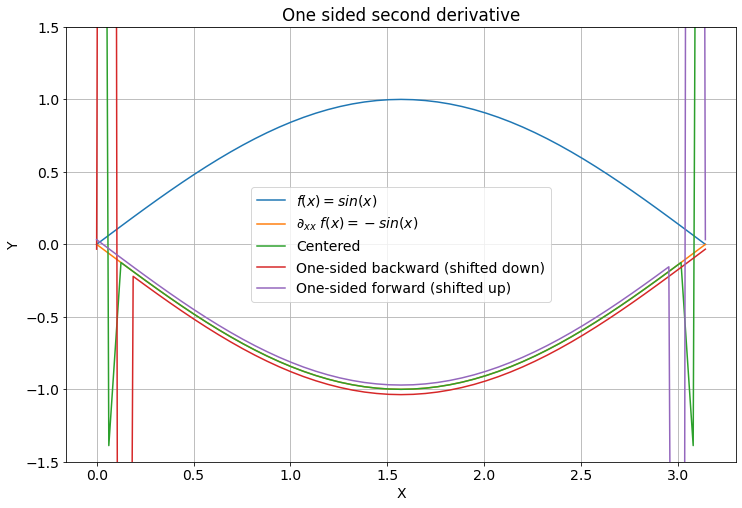

In [5]:
plt.figure(figsize=(12,8))

shift = 0.033
plt.plot(xarr, f.data, label='$f(x)=sin(x)$')
plt.plot(xarr, g2.data, label='$\partial_{xx}\ f(x) = -sin(x)$')
plt.plot(xarr, d2a.data, label='Centered')
plt.plot(xarr, d2b.data-shift, label='One-sided backward (shifted down)')
plt.plot(xarr, d2c.data+shift, label='One-sided forward (shifted up)')
plt.ylim([-1.5, +1.5])
plt.legend(loc='center')
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("One sided second derivative")

## References

- **Generation of Finite Difference Formulas on Arbitrarily Spaced Grids** (1988)
<br>Bengt Fornberg
<br>Mathematics of Computation, Vol. 51, No. 184
<br>http://dx.doi.org/10.1090/S0025-5718-1988-0935077-0
<br>https://web.njit.edu/~jiang/math712/fornberg.pdf

## 